In [1]:
import pandas as pd

# Load your datasets
df_soil = pd.read_csv(r"D:\Downloads\soil.csv")
df_soil_target = pd.read_csv(r"D:\Downloads\soil_target.csv")

# Inspect the data
print(df_soil.head())
print(df_soil_target.head())


    A(410)   B(435)   C(460)   D(485)   E(510)   F(535)  G(560)  H(585)  \
0  1945.57   992.41  2051.13   707.77   822.51  1371.58  318.71  315.85   
1  2336.77   816.05  2008.33   693.91   848.56  1691.27  373.00  375.11   
2  1625.50  1070.13  2472.09   810.33   960.65  1745.17  428.89  436.37   
3  2557.95  1594.40  2790.56  1008.17  1128.00  1570.73  488.55  499.64   
4  3262.28  1300.30  2948.80   949.85  1114.58  2049.14  501.99  513.20   

    R(610)  I(645)  S(680)  J(705)  U(760)  V(810)  W(860)  K(900)  L(940)  \
0  1305.33  159.24  329.50   49.90   75.75  237.65  305.23   60.10   36.52   
1  1339.28  188.68  308.97   62.27   69.30  242.82  277.02   82.78   44.74   
2  1206.99  226.15  292.57   63.53   68.50  211.82  273.69   88.45   47.47   
3  1339.11  261.84  357.22   77.09   77.36  229.90  315.37   98.09   54.78   
4  1482.11  268.53  338.74   77.09   75.75  260.90  307.48  108.30   55.69   

   T(730)  
0   83.32  
1   77.27  
2   75.75  
3   84.07  
4   86.69  
     pH 

In [2]:
print(df_soil.shape)
print(df_soil_target.shape)


(100, 18)
(100, 13)


In [3]:
import numpy as np

# Number of new rows to add
num_new_rows = 900

# Function to generate new rows by adding small random perturbations
def augment_data(df, num_new_rows):
    new_rows = df.sample(n=num_new_rows, replace=True).apply(
        lambda x: x + np.random.normal(loc=0, scale=0.05 * x.std(), size=len(x))
    )
    return pd.concat([df, new_rows], ignore_index=True)

# Augment both datasets
augmented_soil = augment_data(df_soil, num_new_rows)
augmented_soil_target = augment_data(df_soil_target, num_new_rows)

# Save the augmented datasets
augmented_soil.to_csv('augmented_soil.csv', index=False)
augmented_soil_target.to_csv('augmented_soil_target.csv', index=False)

print("Augmentation completed and saved to 'augmented_soil.csv' and 'augmented_soil_target.csv'")


Augmentation completed and saved to 'augmented_soil.csv' and 'augmented_soil_target.csv'


In [4]:
# Replace null values in columns with the column mean
df_filled_soil = df_soil.fillna(df_soil.mean())
df_filled_soil_target = df_soil_target.fillna(df_soil_target.mean())

# Save the updated datasets
df_filled_soil.to_csv('filled_soil.csv', index=False)
df_filled_soil_target.to_csv('filled_soil_target.csv', index=False)

print("Null values replaced with column mean and saved to 'filled_soil.csv' and 'filled_soil_target.csv'")


Null values replaced with column mean and saved to 'filled_soil.csv' and 'filled_soil_target.csv'


In [5]:
X=pd.read_csv('augmented_soil.csv')

In [6]:
y=pd.read_csv('augmented_soil_target.csv')

In [7]:
data=pd.concat([X,y],axis=1)

In [8]:
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score

from sklearn.gaussian_process.kernels import RBF
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt

In [9]:
#Defining function for Continuous variable
def plot_conti(x):
    fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(15,5),tight_layout=True)
    axes[0].set_title('Histogram')
    sns.histplot(x,ax=axes[0])
    axes[1].set_title('Checking Outliers')
    sns.boxplot(x,ax=axes[1])
    

C:\Users\Vanshika\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Vanshika\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Vanshika\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Vanshika\anac

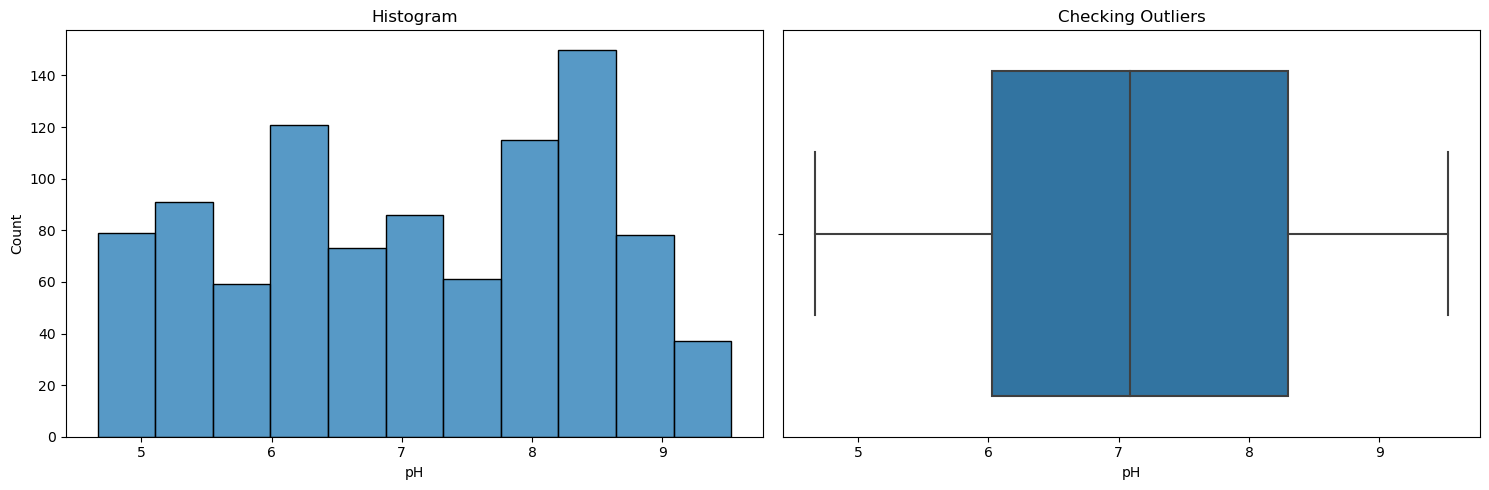

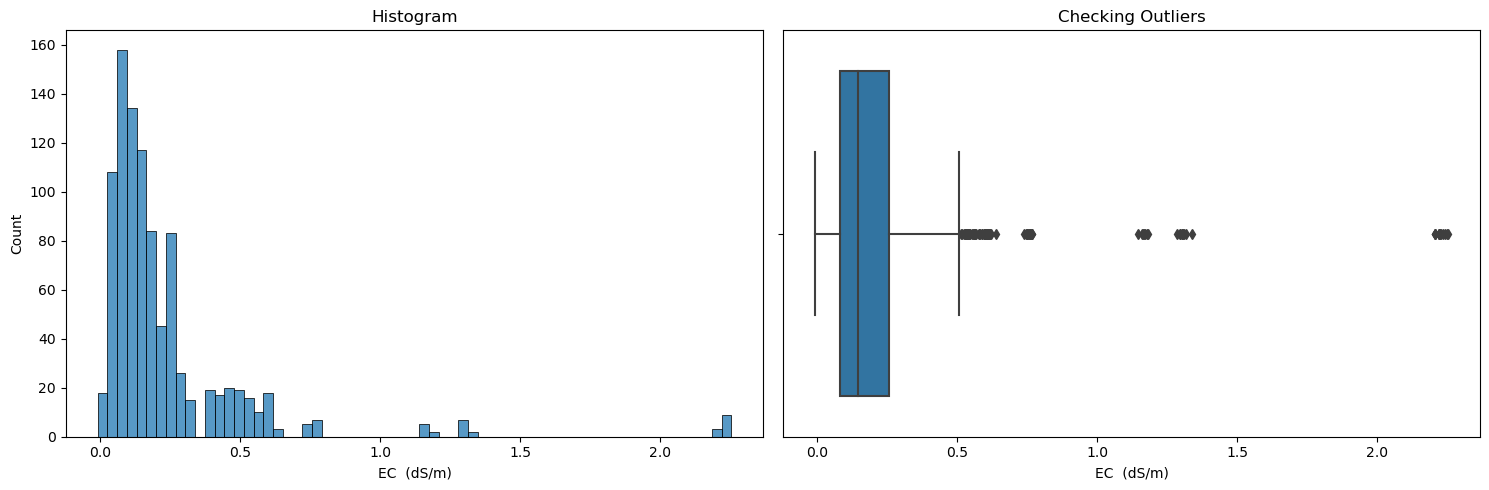

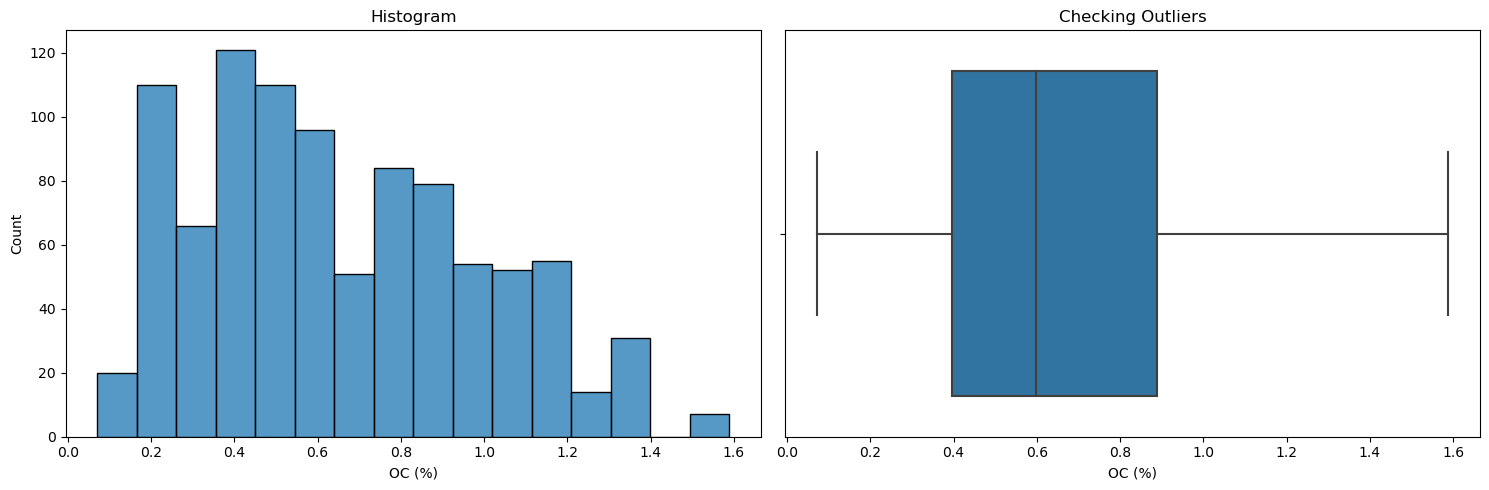

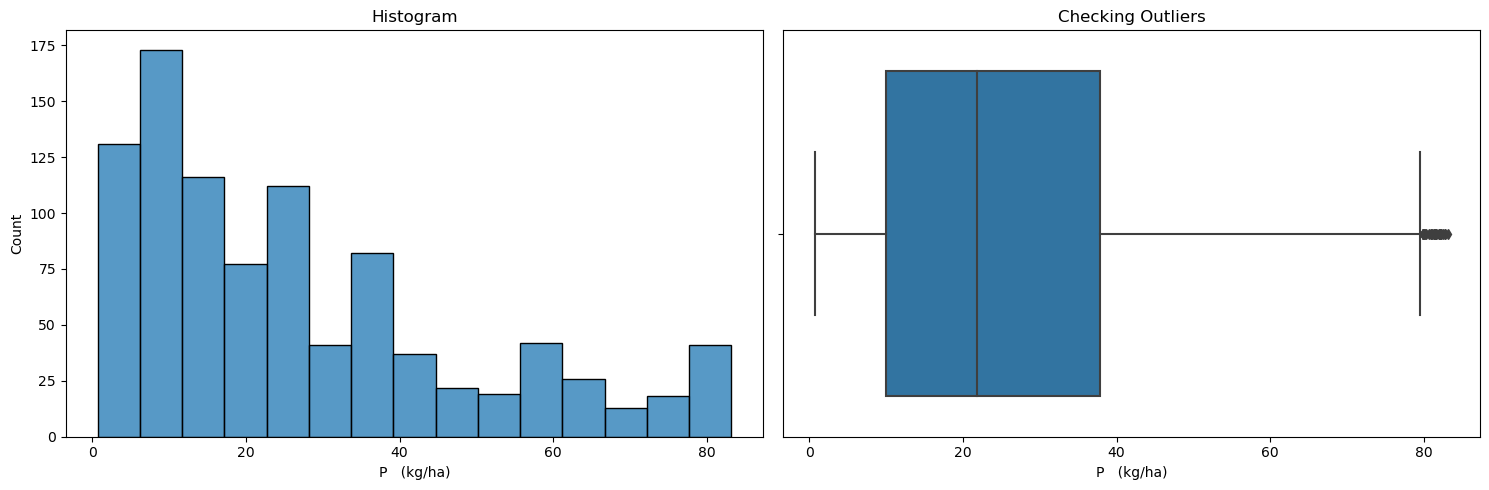

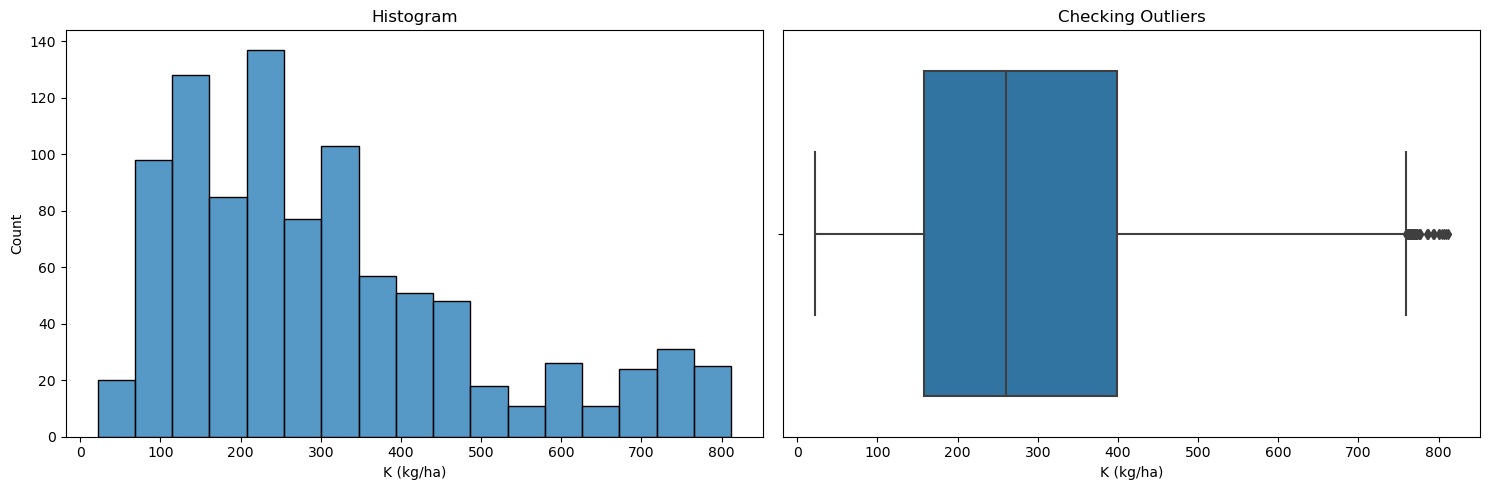

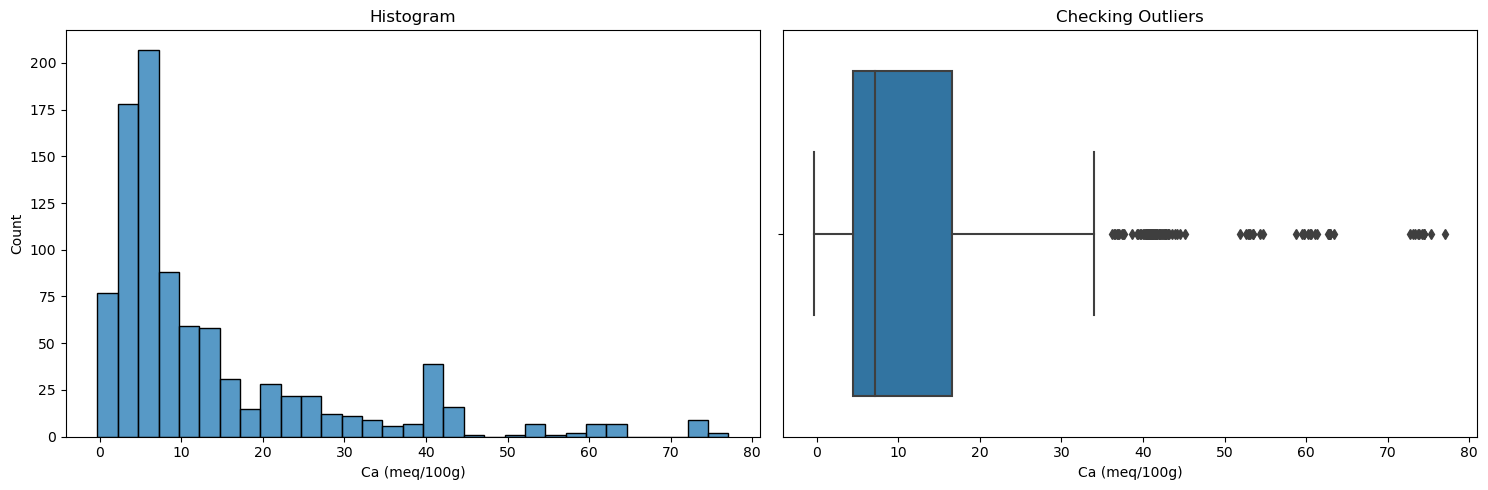

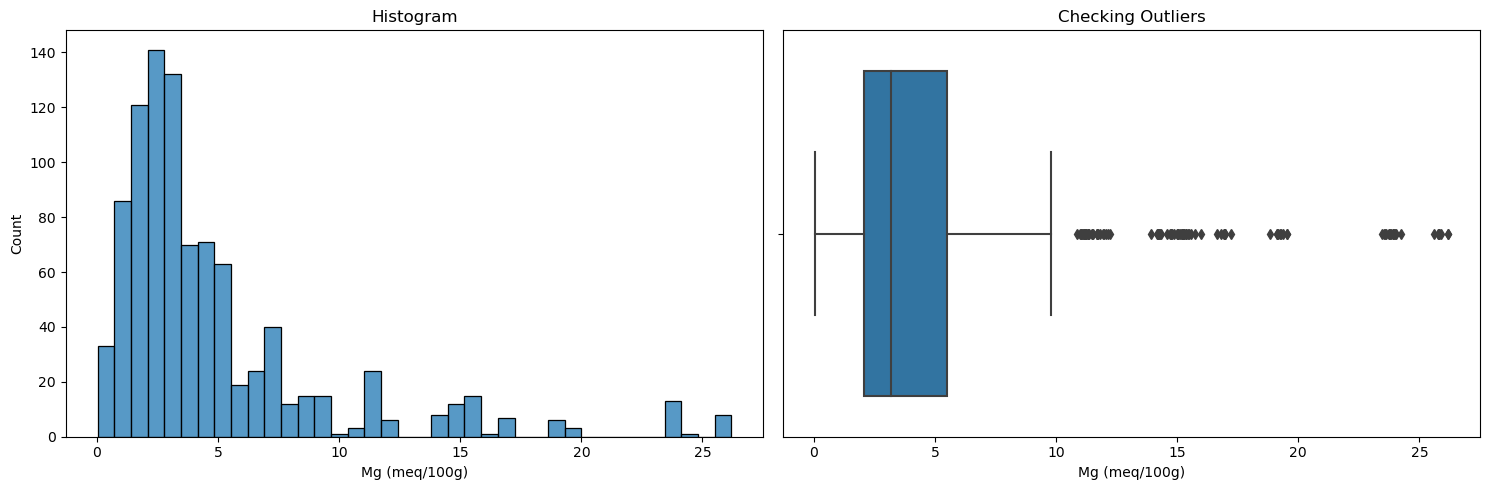

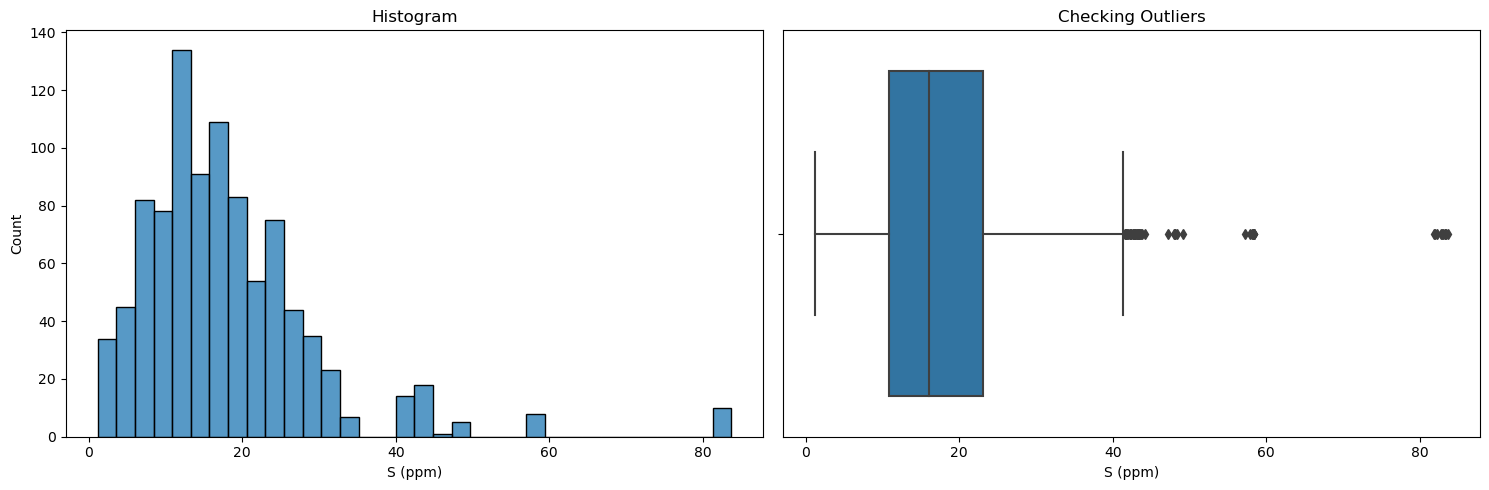

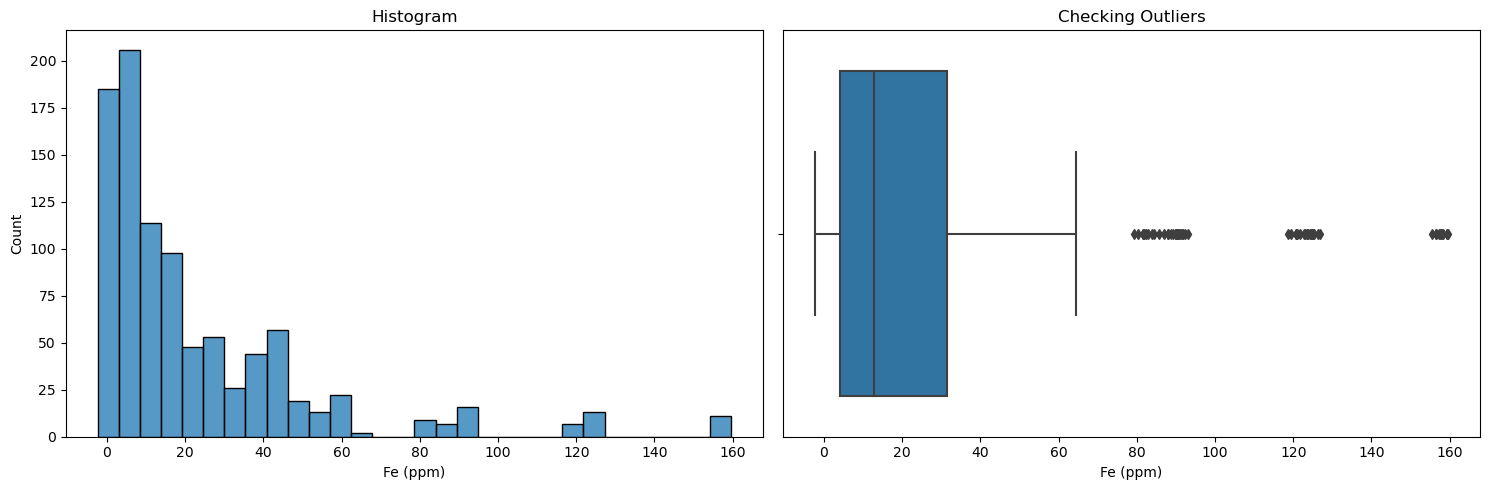

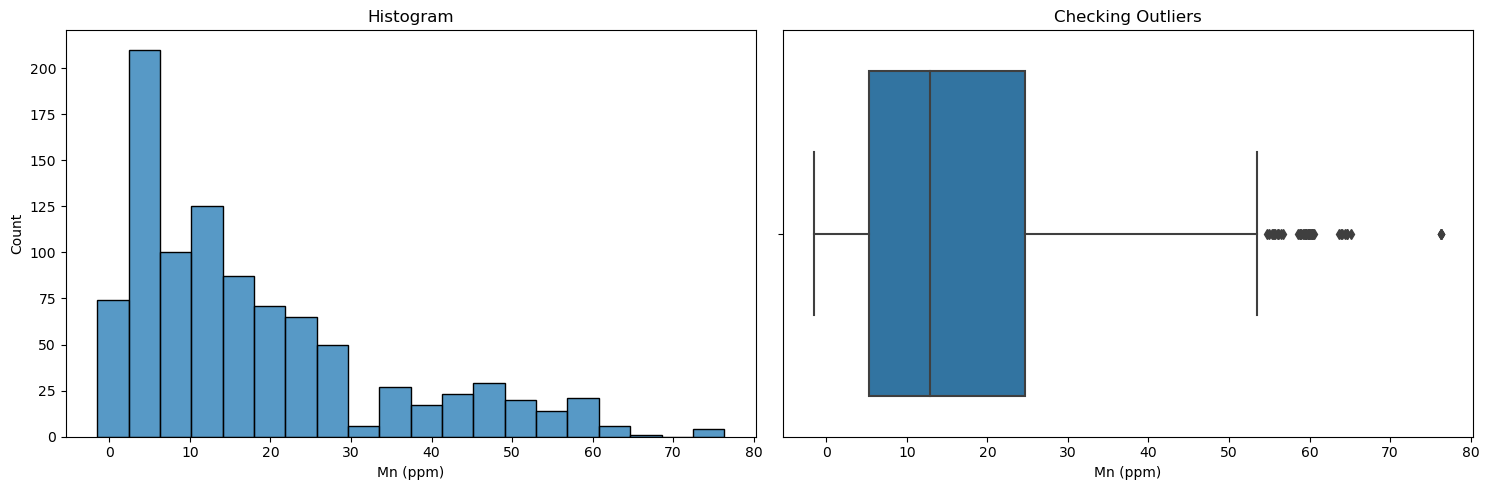

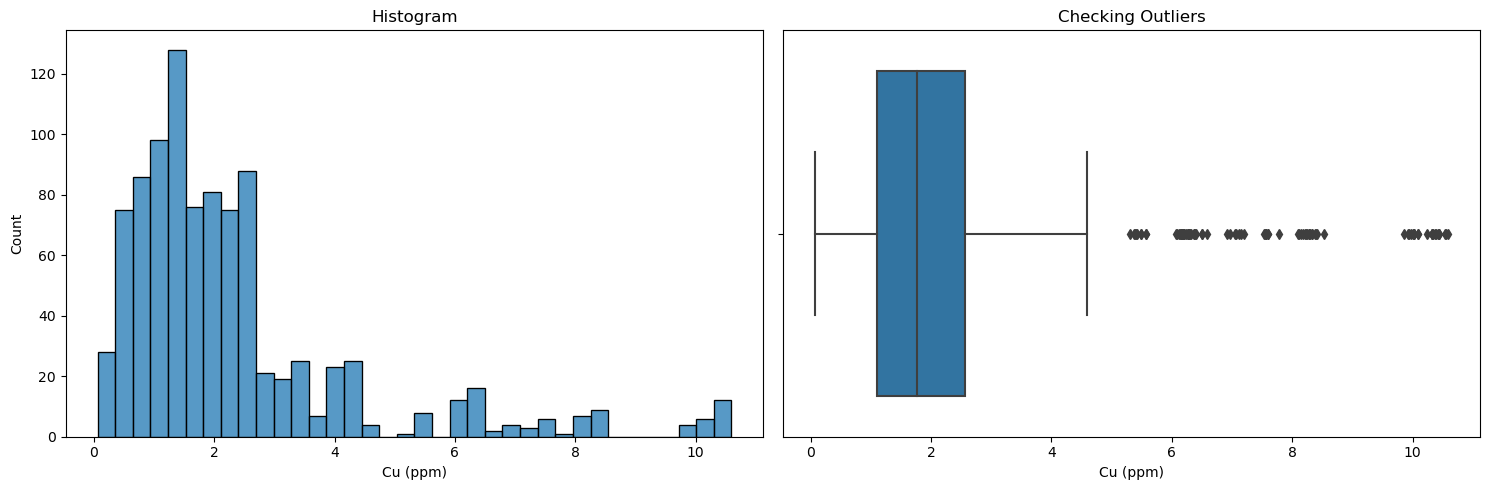

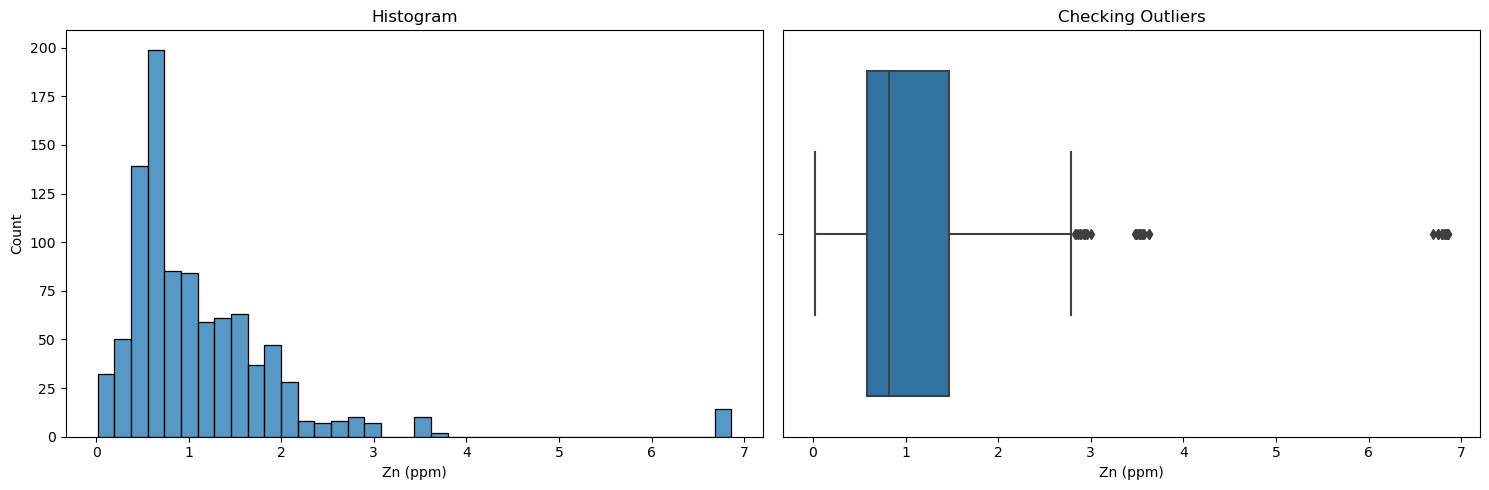

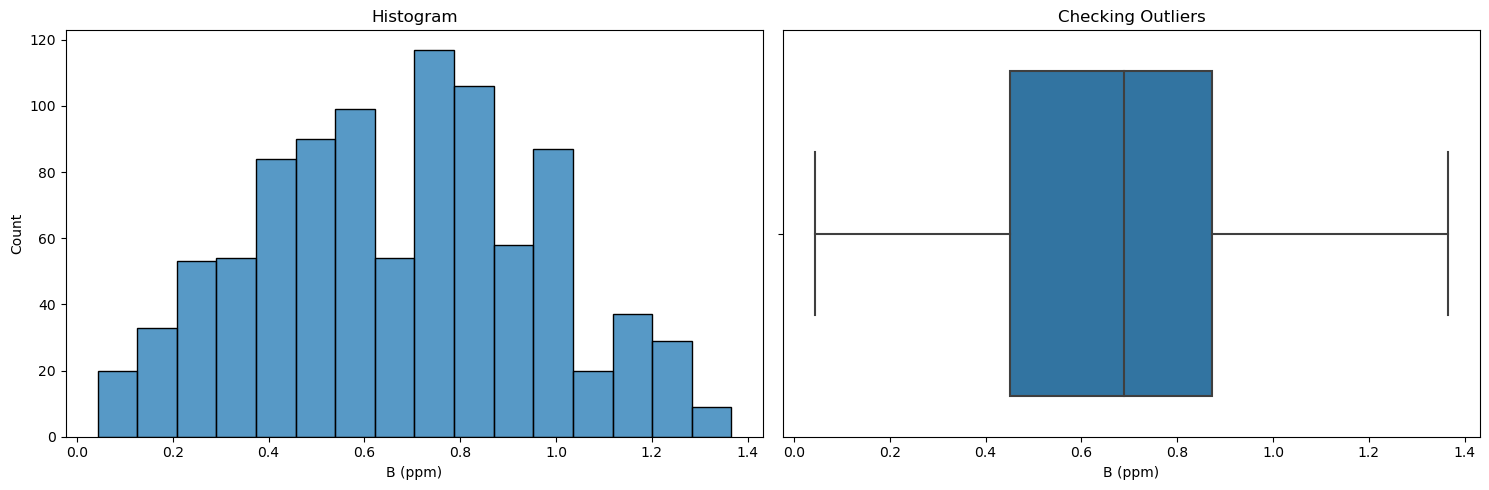

In [10]:
#plotting the target values
import seaborn as sns
for col in y.columns:
    plot_conti(y[col])

In [11]:
# Impute missing values in features and target
imputer_X = SimpleImputer(strategy='mean')
X_imputed = imputer_X.fit_transform(X)
imputer_y = SimpleImputer(strategy='mean')
y_imputed = imputer_y.fit_transform(y)


In [12]:
# Preprocess the data
from sklearn.preprocessing import RobustScaler
scaler_X = RobustScaler()
X_scaled = scaler_X.fit_transform(X_imputed)

In [13]:
from sklearn.preprocessing import MinMaxScaler

# Initialize Min-Max Scaler (for normalization)
scaler_norm = MinMaxScaler()

# Fit and transform the scaled data
X_scaled_norm = scaler_norm.fit_transform(X_scaled)


In [14]:
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score
from sklearn.preprocessing import RobustScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_imputed, test_size=0.2, random_state=42)

In [16]:
# Model training with hyperparameter tuning for KNeighborsRegressor
knn_param_grid = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

knn = KNeighborsRegressor()
knn_grid_search = GridSearchCV(estimator=knn, param_grid=knn_param_grid, cv=5, n_jobs=-1, scoring='neg_mean_squared_error')
knn_grid_search.fit(X_train, y_train)

best_knn_model = knn_grid_search.best_estimator_


KNeighborsRegressor Feature Importance:
   Feature  Importance
0   A(410)    0.021479
1   B(435)    0.021479
16  L(940)    0.021479
15  K(900)    0.021479
14  W(860)    0.021479
13  V(810)    0.021479
12  U(760)    0.021479
11  J(705)    0.021479
10  S(680)    0.021479
9   I(645)    0.021479
8   R(610)    0.021479
7   H(585)    0.021479
6   G(560)    0.021479
5   F(535)    0.021479
4   E(510)    0.021479
3   D(485)    0.021479
2   C(460)    0.021479
17  T(730)    0.021479


C:\Users\Vanshika\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but KNeighborsRegressor was fitted without feature names
  warnings.warn(


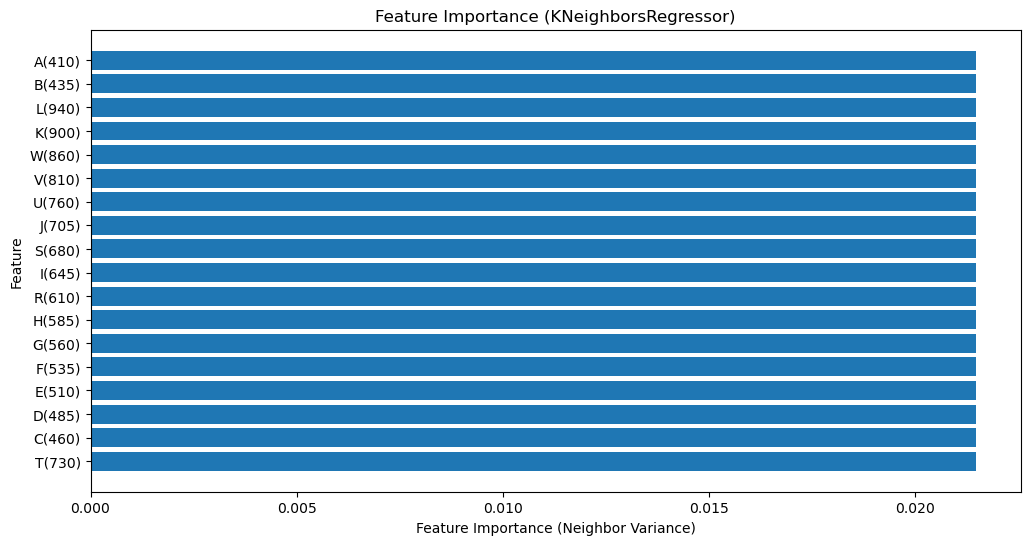

In [17]:
def feature_importance_analysis_knn(model, X):
    # Compute the variance of each feature across neighbors for each sample
    neighbor_variances = np.var(model.kneighbors(X)[0], axis=1).mean(axis=0)

    # Create DataFrame
    importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': neighbor_variances})
    importance_df = importance_df.sort_values(by='Importance', ascending=False)

    # Display importance values
    print(importance_df)

    # Plot feature importances
    plt.figure(figsize=(12, 6))
    plt.barh(importance_df['Feature'], importance_df['Importance'], align='center')
    plt.xlabel('Feature Importance (Neighbor Variance)')
    plt.ylabel('Feature')
    plt.title('Feature Importance (KNeighborsRegressor)')
    plt.gca().invert_yaxis()
    plt.show()

# Apply feature importance analysis for KNeighborsRegressor
print("\nKNeighborsRegressor Feature Importance:")
feature_importance_analysis_knn(best_knn_model, X)

In [19]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

def evaluate_model(model, X_train, X_test, y_train, y_test):
    # Training predictions
    y_train_pred = model.predict(X_train)
    
    # Testing predictions
    y_test_pred = model.predict(X_test)
    
    # Calculate evaluation metrics
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    train_mae = mean_absolute_error(y_train, y_train_pred)
    test_mae = mean_absolute_error(y_test, y_test_pred)
    train_rmse=np.sqrt(train_mse)
    
    # Print the metrics
    print(f"Mean Squared Error (MSE): {train_mse}")
    print(f"R-squared (R2) Score: {test_r2}")
    print(f"Mean Absolute Error (MAE): {train_mae}")
    print(f"Root Mean Squared Error (RMSE): {train_rmse}")

print("\nKNN Model Evaluation:")
evaluate_model(best_knn_model, X_train, X_test, y_train, y_test)



KNN Model Evaluation:
Mean Squared Error (MSE): 2321.62569522584
R-squared (R2) Score: -0.15160968243853096
Mean Absolute Error (MAE): 15.426443237377326
Root Mean Squared Error (RMSE): 48.183251189867214


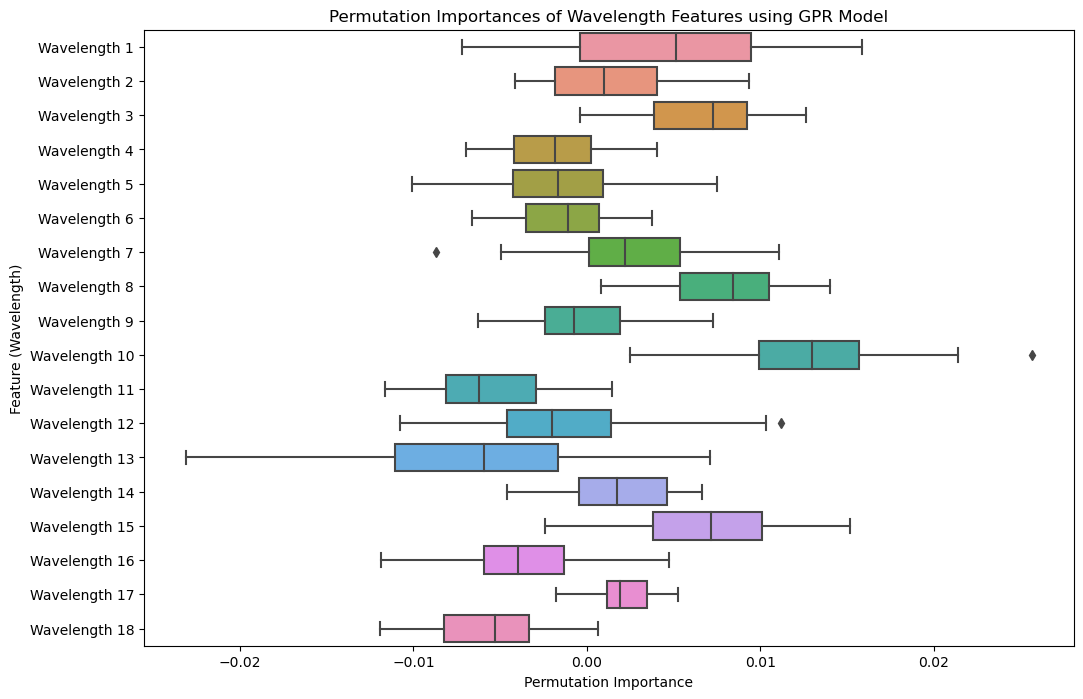

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.inspection import permutation_importance

# Function to compute and plot feature importances using permutation importance
def plot_feature_importances(model, X_test, y_test, feature_names):
    # Compute permutation importance
    perm_importance = permutation_importance(model, X_test, y_test, n_repeats=30, random_state=42)
    importances = perm_importance.importances.T  # Transpose to have shape (n_repeats, n_features)
    
    # Create a DataFrame for plotting
    importance_df = pd.DataFrame(importances, columns=feature_names)
    
    # Plot box plots
    plt.figure(figsize=(12, 8))
    sns.boxplot(data=importance_df, orient='h')
    plt.xlabel('Permutation Importance')
    plt.ylabel('Feature (Wavelength)')
    plt.title('Permutation Importances of Wavelength Features using GPR Model')
    plt.show()

# Assuming `X_test` is your test set features and `feature_names` is the list of feature names
feature_names = [f'Wavelength {i+1}' for i in range(X_test.shape[1])]

# Plot feature importances for knn model
plot_feature_importances(best_knn_model, X_test, y_test, feature_names)

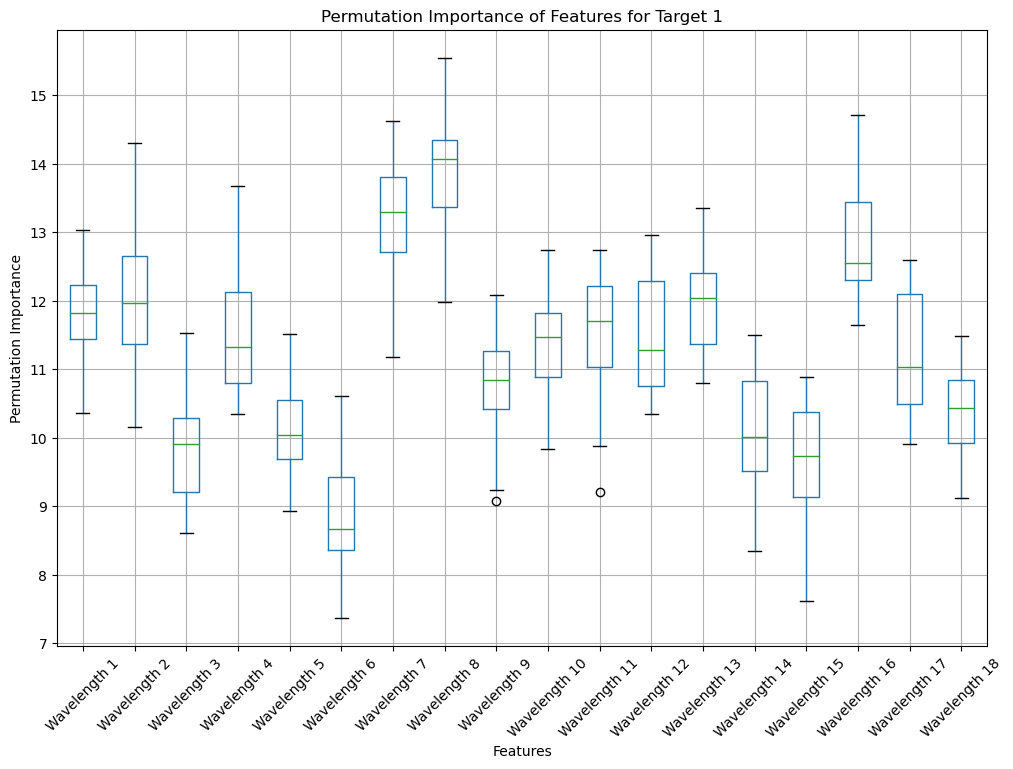

C:\Users\Vanshika\anaconda3\lib\site-packages\sklearn\gaussian_process\kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


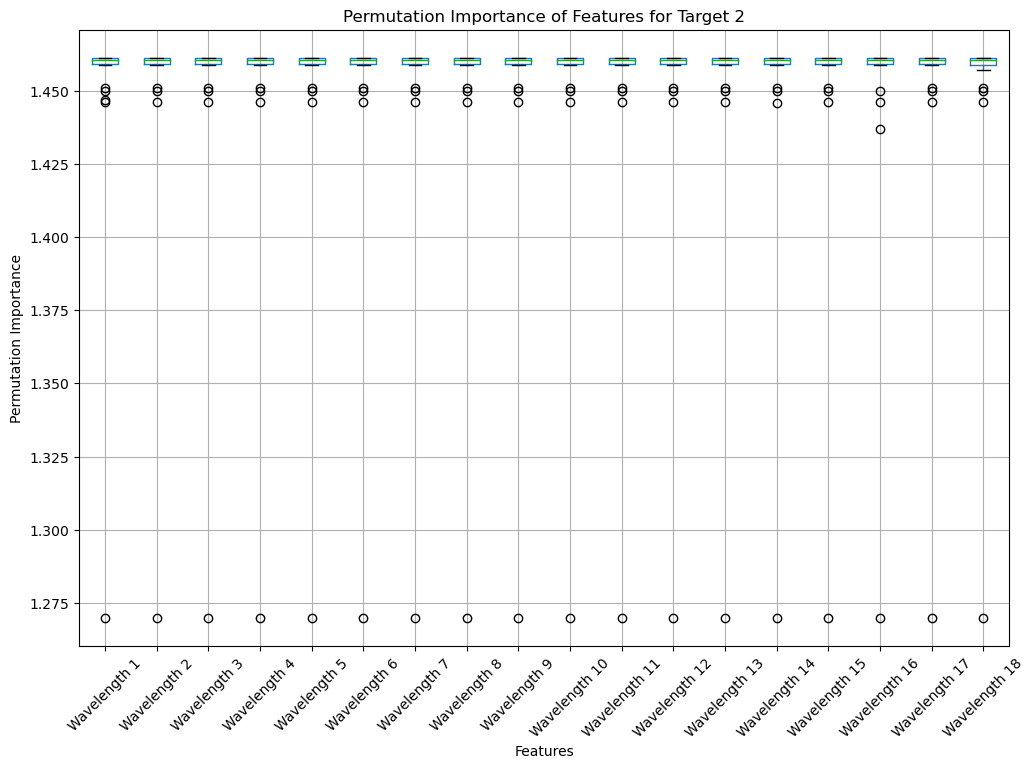

C:\Users\Vanshika\anaconda3\lib\site-packages\sklearn\gaussian_process\kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


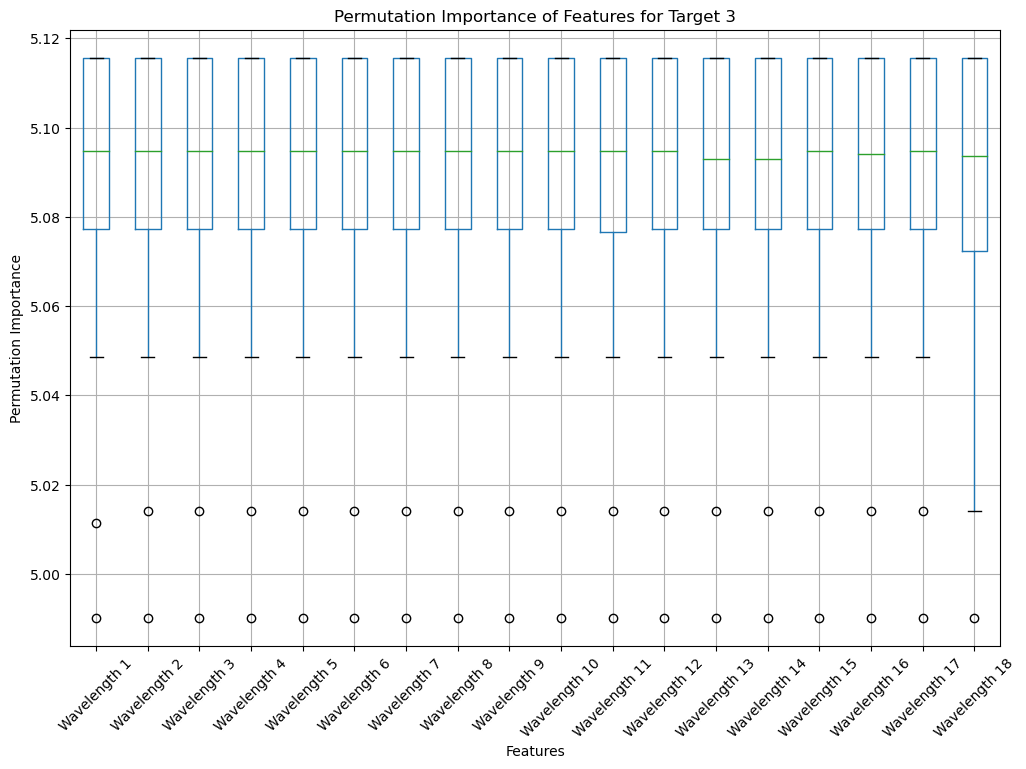

C:\Users\Vanshika\anaconda3\lib\site-packages\sklearn\gaussian_process\kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


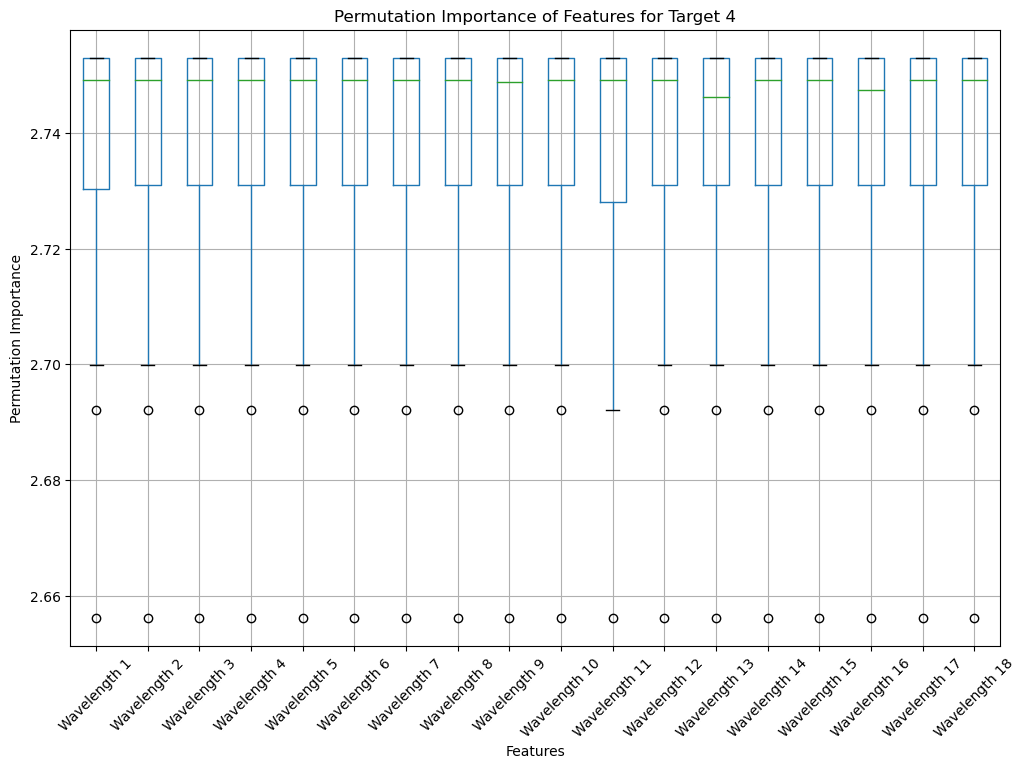

C:\Users\Vanshika\anaconda3\lib\site-packages\sklearn\gaussian_process\kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


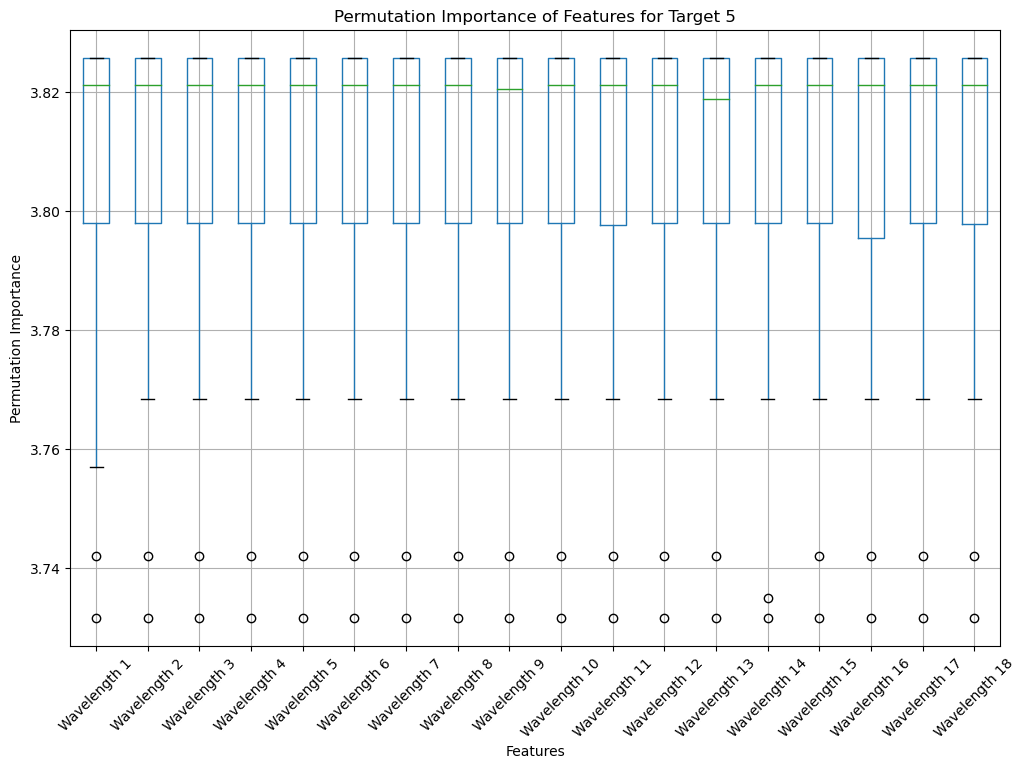

C:\Users\Vanshika\anaconda3\lib\site-packages\sklearn\gaussian_process\kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


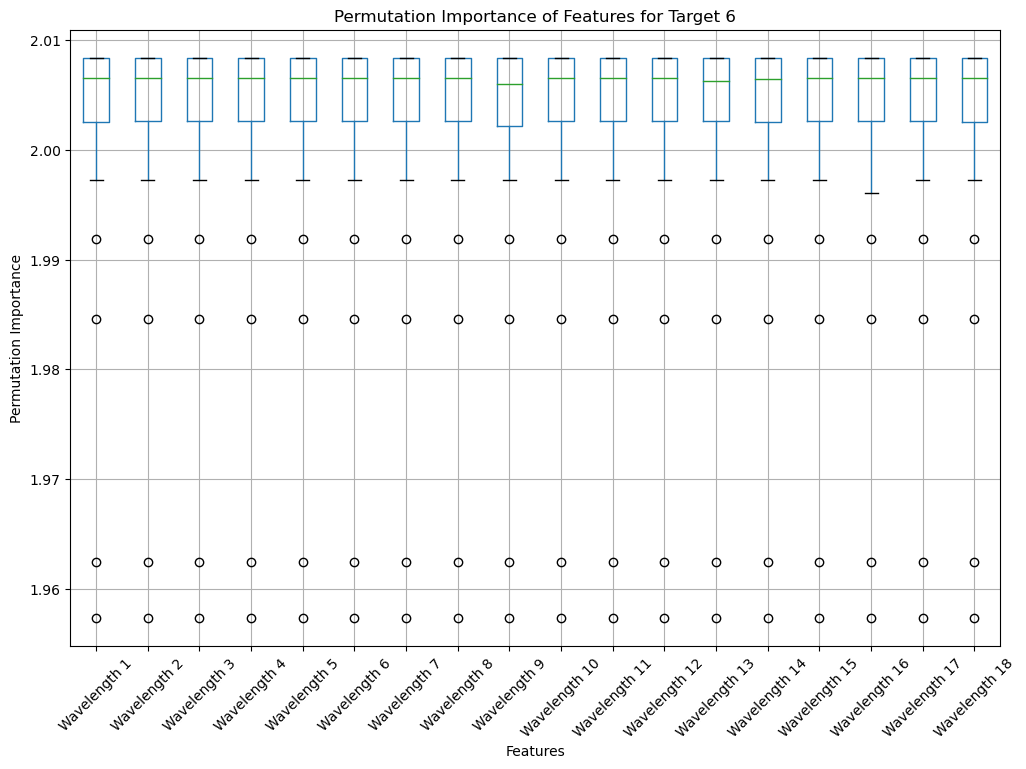

C:\Users\Vanshika\anaconda3\lib\site-packages\sklearn\gaussian_process\kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


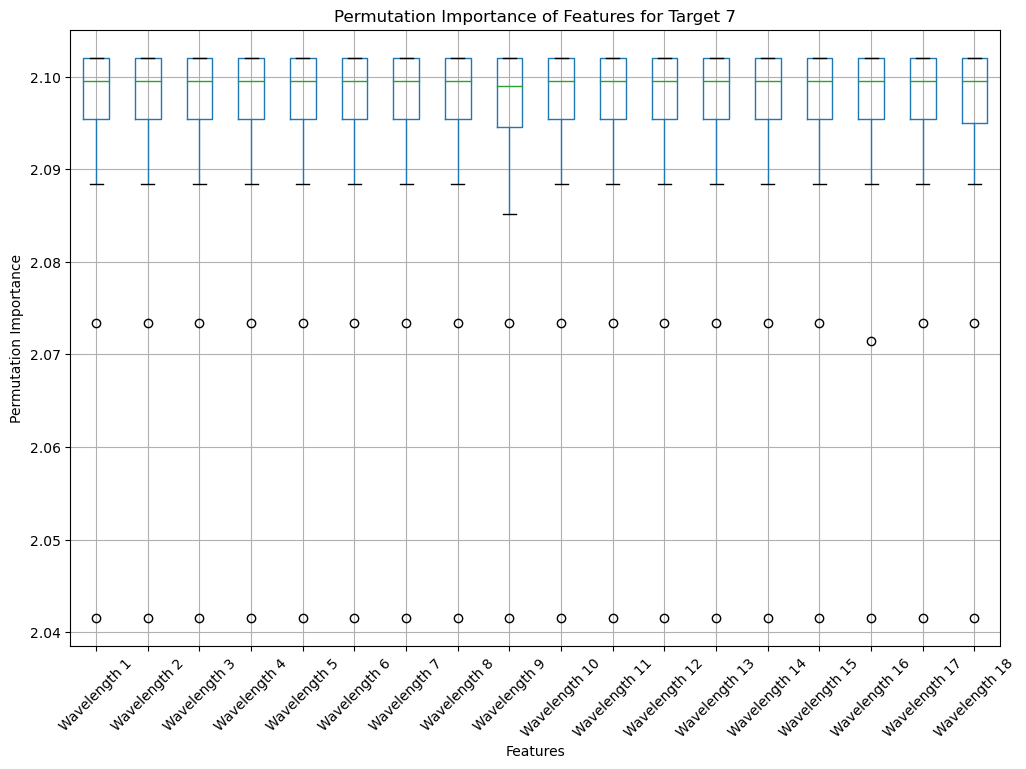

C:\Users\Vanshika\anaconda3\lib\site-packages\sklearn\gaussian_process\kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


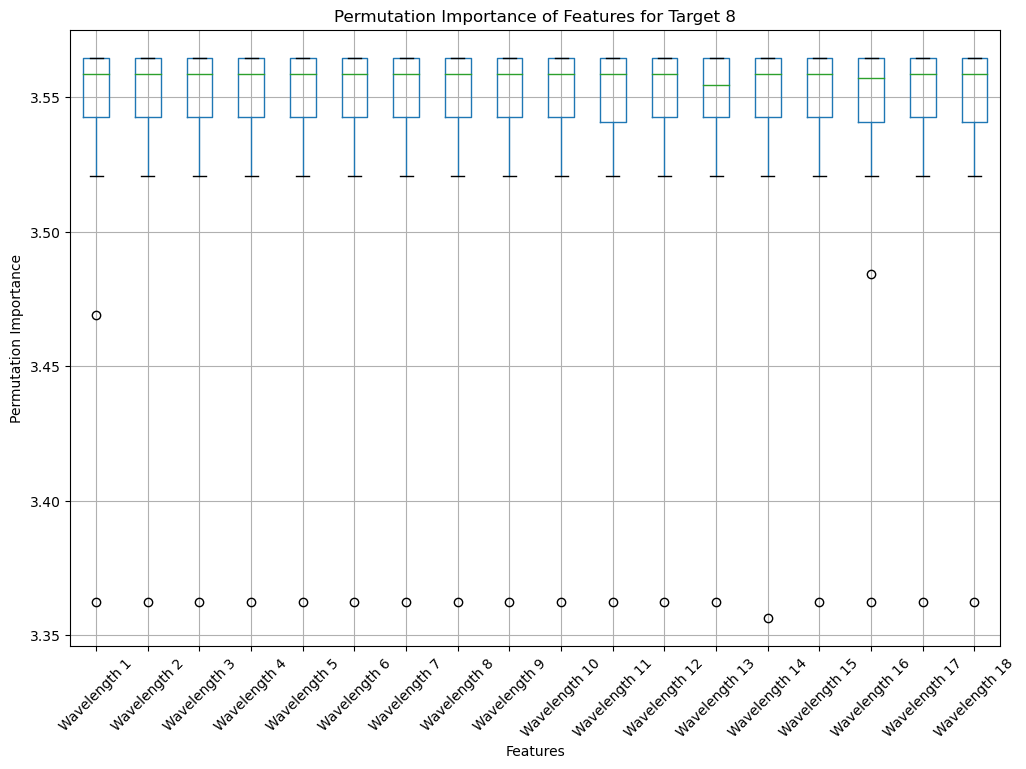

C:\Users\Vanshika\anaconda3\lib\site-packages\sklearn\gaussian_process\kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


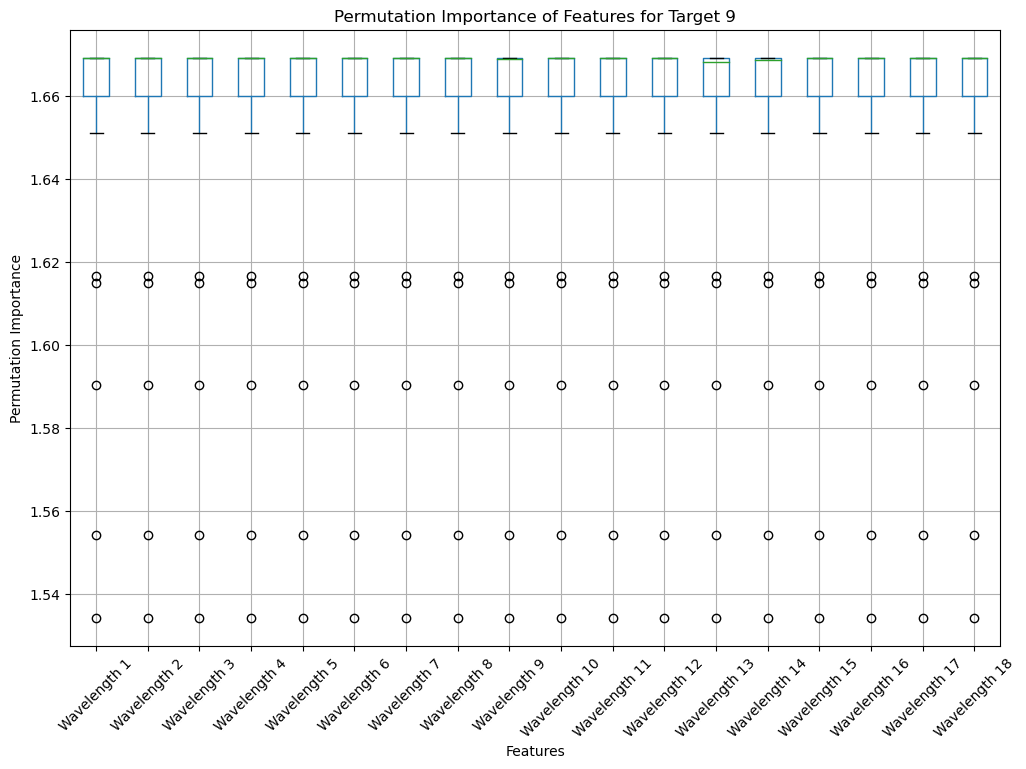

C:\Users\Vanshika\anaconda3\lib\site-packages\sklearn\gaussian_process\kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


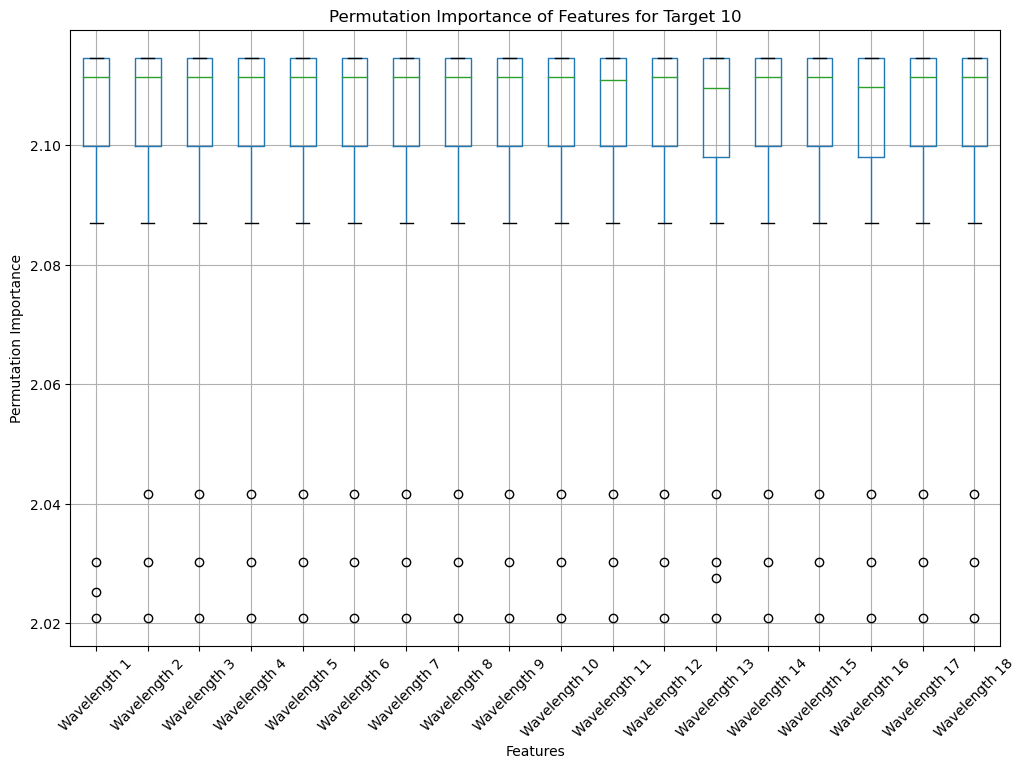

C:\Users\Vanshika\anaconda3\lib\site-packages\sklearn\gaussian_process\kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


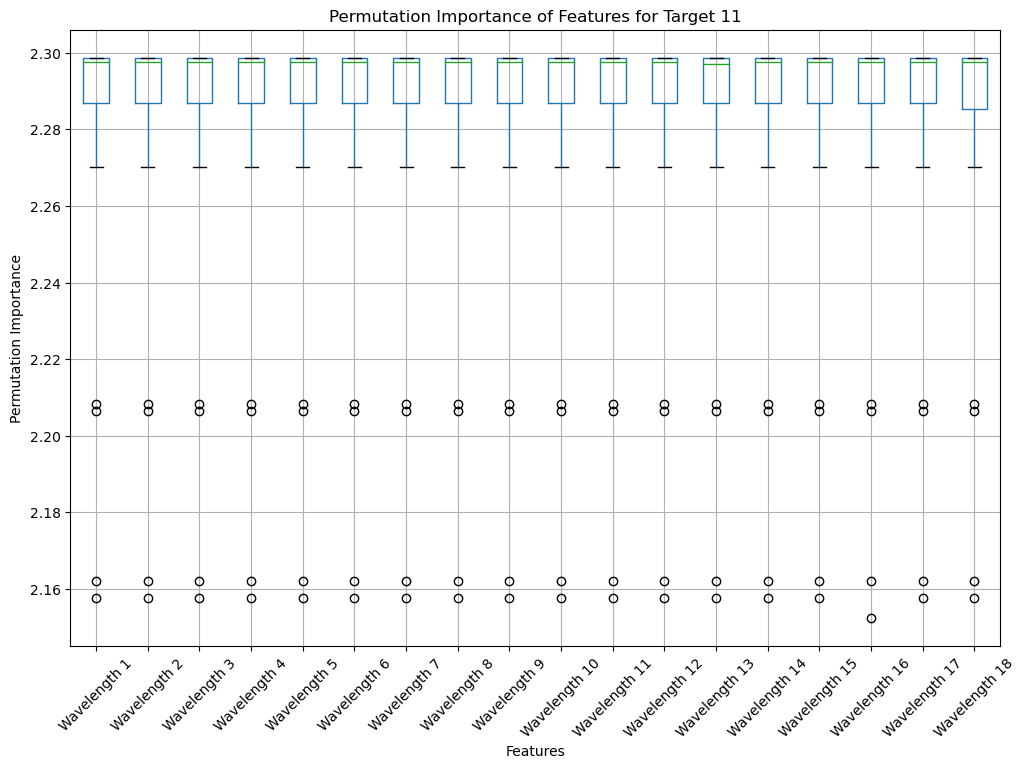

C:\Users\Vanshika\anaconda3\lib\site-packages\sklearn\gaussian_process\kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


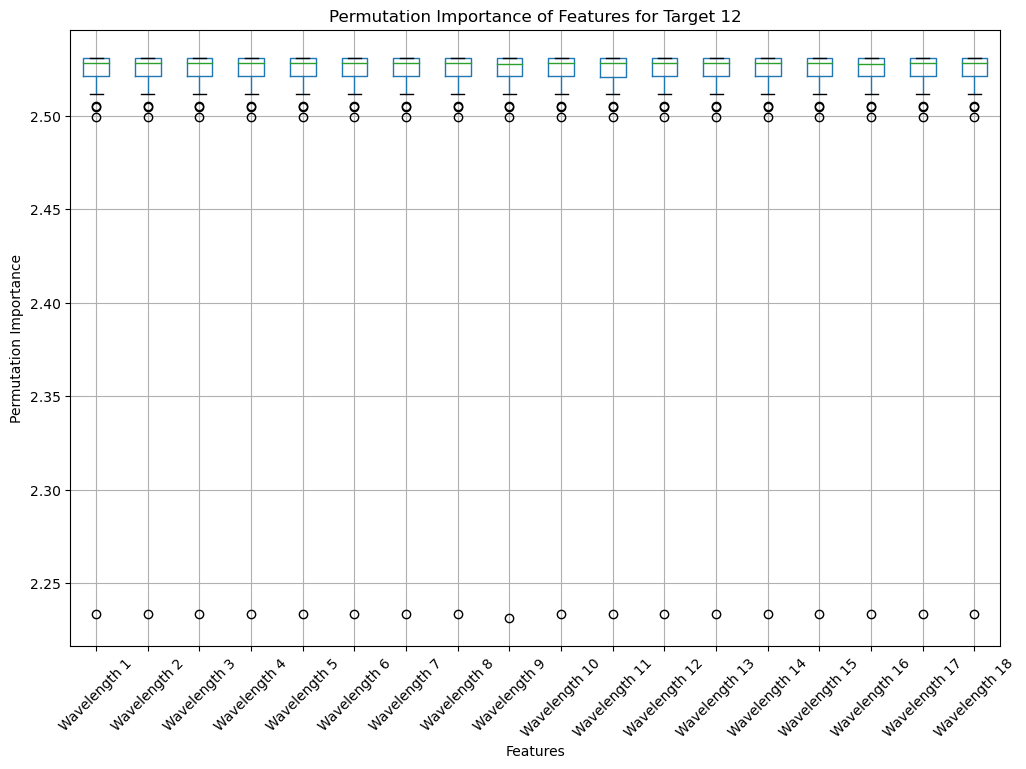

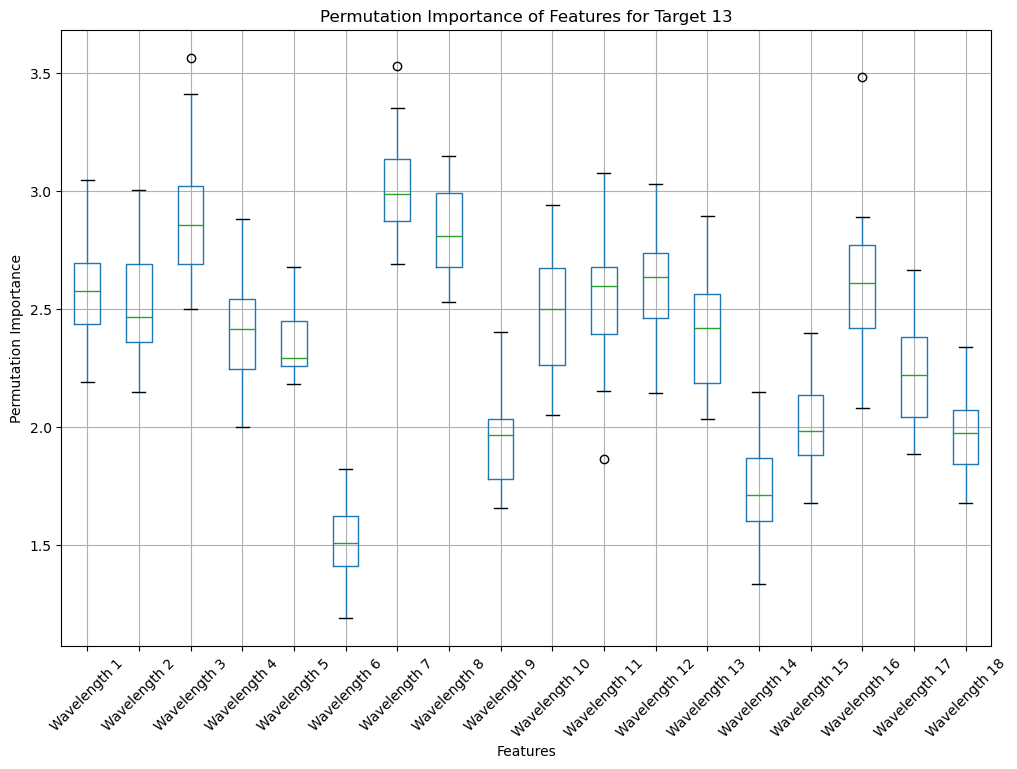

In [21]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.inspection import permutation_importance
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF

def plot_feature_importances_for_each_target(X_test, y_test, feature_names):
    # Ensure y_test is a DataFrame for easier handling of multiple targets
    y_test_df = pd.DataFrame(y_test)
    
    for i in range(y_test_df.shape[1]):
        y_test_target = y_test_df.iloc[:, i].values
        
        # Fit a separate GPR model for each target
        model = GaussianProcessRegressor(kernel=RBF(length_scale=1))
        model.fit(X_test, y_test_target)
        
        # Get permutation importances
        perm_importance = permutation_importance(model, X_test, y_test_target, n_repeats=30, random_state=0)
        importances = perm_importance.importances
        
        # Create a DataFrame for plotting
        importance_df = pd.DataFrame(importances, index=feature_names).T
        
        # Plot box plots
        plt.figure(figsize=(12, 8))
        importance_df.boxplot()
        plt.title(f'Permutation Importance of Features for Target {i+1}')
        plt.xlabel('Features')
        plt.ylabel('Permutation Importance')
        plt.xticks(rotation=45)
        plt.show()

# Define the feature names
feature_names = [f'Wavelength {i+1}' for i in range(X_test.shape[1])]

# Assuming y_test is a 2D array with shape (n_samples, n_targets)
# Convert y_test to DataFrame if it's not already
if not isinstance(y_test, pd.DataFrame):
    y_test = pd.DataFrame(y_test)

# Plot feature importances for each target variable
plot_feature_importances_for_each_target(X_test, y_test, feature_names)

In [22]:
target_columns=y.columns

C:\Users\Vanshika\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RobustScaler was fitted without feature names
  warnings.warn(


{'pH': 7.24646274394191, 'EC  (dS/m)': 0.23217674313699027, 'OC (%)': 0.6427664031749514, 'P   (kg/ha)': 34.35159198552584, 'K (kg/ha)': 397.75551441151754, 'Ca (meq/100g)': 18.7637657561013, 'Mg (meq/100g)': 4.393326143237509, 'S (ppm)': 14.721704803349732, 'Fe (ppm)': 15.063908562530214, 'Mn (ppm)': 12.66072993996617, 'Cu (ppm)': 1.8969999432515625, 'Zn (ppm)': 1.1948020004247943, 'B (ppm)': 0.6667372014393527}


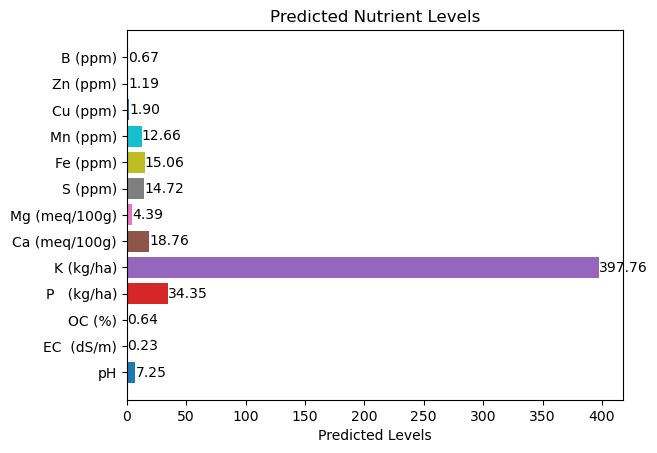

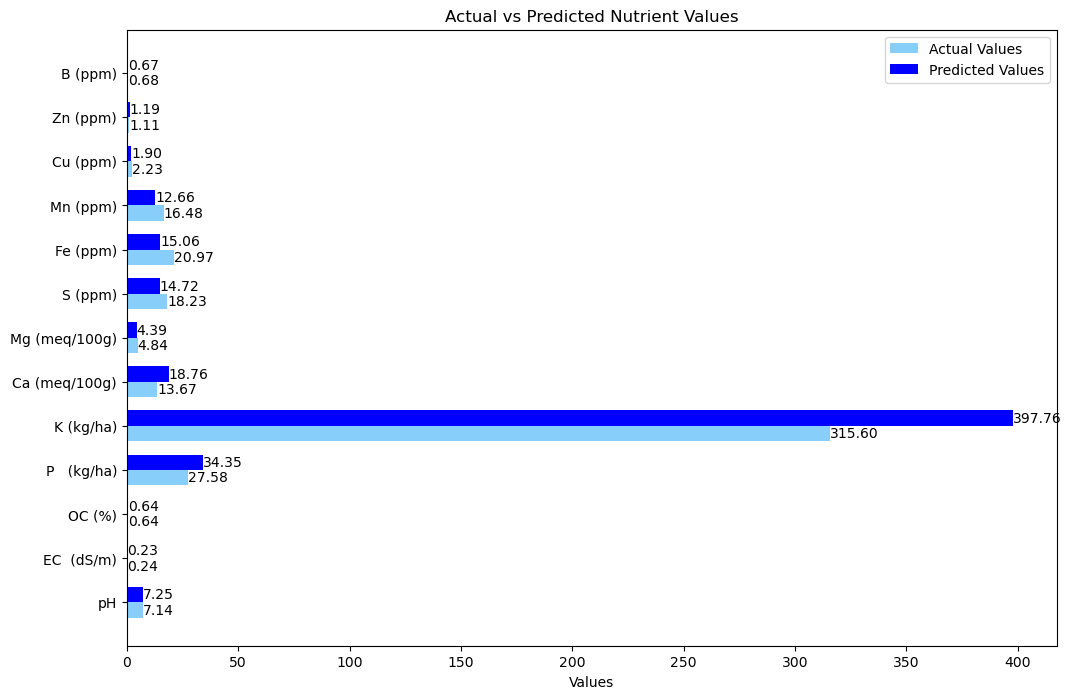

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colors as mcolors

# Sample data
data = {
    'A(410)': [1947.48],
    'B(435)': [992.41],
    'C(460)': [2051.13],
    'D(485)': [707.77],
    'E(510)': [822.51],
    'F(535)': [1371.58],
    'G(560)': [318.85],
    'H(585)': [315.68],
    'R(610)': [1305.33],
    'I(645)': [159.24],
    'S(680)': [329.5],
    'J(705)': [49.9],
    'U(760)': [75.75],
    'V(810)': [237.65],
    'W(860)': [305.23],
    'K(900)': [60.1],
    'L(940)': [36.52],
    'T(730)': [83.32]
}

# Convert input data to DataFrame
def preprocess_input_data(input_data):
    input_df = pd.DataFrame(input_data)
    return input_df

df2 = preprocess_input_data(data)
scaled_input = scaler_X.transform(df2)
prediction = best_knn_model.predict(scaled_input)

# Predicted Nutrient Levels
predicted_values = {}
for i, col in enumerate(target_columns):
    predicted_values[col] = prediction[0][i]

print(predicted_values)

# Plotting bar graph to represent the predicted nutrient levels
colors = list(mcolors.TABLEAU_COLORS.values())
fig, ax = plt.subplots()
bars = ax.barh(list(predicted_values.keys()), list(predicted_values.values()), color=colors[:len(predicted_values)])
ax.set_xlabel('Predicted Levels')
ax.set_title('Predicted Nutrient Levels')

# Adding color to each bar and displaying the value
for bar, value in zip(bars, predicted_values.values()):
    ax.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f'{value:.2f}', va='center')

plt.show()

# Plot for actual vs predicted values
plt.figure(figsize=(12, 8))

# Bar width for both actual and predicted values
bar_width = 0.35

# Indices for nutrient labels
indices = np.arange(len(target_columns))


# Plot actual values
actual_bars = plt.barh(indices - bar_width / 2, y_test.mean(), bar_width, label='Actual Values', color='lightskyblue')

# Plot predicted values
predicted_bars = plt.barh(indices + bar_width / 2, [predicted_values[col] for col in target_columns], bar_width, label='Predicted Values', color='blue')

# Adding nutrient labels
plt.yticks(indices, target_columns)

# Adding labels and title
plt.xlabel('Values')
plt.title('Actual vs Predicted Nutrient Values')
plt.legend()

# Adding values on the bars
for actual_bar, predicted_bar in zip(actual_bars, predicted_bars):
    plt.text(actual_bar.get_width(), actual_bar.get_y() + actual_bar.get_height() / 2, f'{actual_bar.get_width():.2f}', va='center')
    plt.text(predicted_bar.get_width(), predicted_bar.get_y() + predicted_bar.get_height() / 2, f'{predicted_bar.get_width():.2f}', va='center')

plt.show()